In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


/var/folders/m1/0pv5jqcs6h34_x160t92550h0000gn/T/ipykernel_59251/1015374048.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1.3 - Law of reflection

In [2]:
# Constants

L_laser_to_mirror = 45*10**(-2) # m
L_laser_to_wall = 48 * 10**(-2) # m

theta_laser_mirror_wall = 45 # degrees
theta_mirror_wall_laser = 45 # degrees
theta_wall_laser_mirror = 90 # degrees
theta_0 = 0 # degrees

Angle_measurement_error = 2 # degrees
Distance_measurement_error = 1 * 10**(-2) # m

#### Measurements

In [3]:
# Measured data

measured_y_mirror = 48 * 10**(-2) # m
angels_measured = [23, 25, 26, 27, 28, 28, 29] # degrees
#measured_distance_katet_mirror_wall = [45, 40, 38, 36, 34, 32, 30] * 10**(-2) # m
measured_distance_katet_mirror_wall = [x * 10**(-2) for x in [45, 40, 38, 36, 34, 32, 30]]



#### Analysis

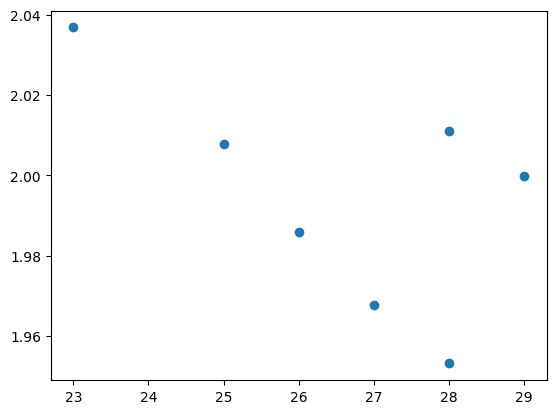

In [4]:
# Plot reflected angle to incident angles 

incident_angles = np.array(angels_measured)

measured_distance_katet_mirror_wall_array = np.array(measured_distance_katet_mirror_wall)
reflected_angles = (np.arctan(measured_y_mirror / measured_distance_katet_mirror_wall_array) * 180 / np.pi)/ angels_measured
plt.plot(incident_angles, reflected_angles, 'o')

Here we see that it is very close to the desired answer of 2

# 1.4 - Law of reflection

In [5]:
angle_measured_no_TIR = 40 # degrees
calculated_no_TIR = np.arcsin(1/1.5195)

print(f"measured angle: {angle_measured_no_TIR} degrees\ncalculated angle {calculated_no_TIR * 180 / np.pi} degrees")

measured angle: 40 degrees
calculated angle 41.155982346658426 degrees


Vertification of Snell's law

$\delta$ was calculated by measuring the angle between the direction of the laser before and after refraction. Then we used the equation defined underneath as calculate_snell_angle to calculate the measured and theoretical value of $\delta$

In [16]:

def calculate_snell_angle(n1, theta1):
    return np.arcsin(n1 * np.sin(degrees_45-np.arcsin(np.sin(theta1)/n1)))

def print_radians_as_degrees(radians):
    return radians * 180 / np.pi

degrees_45 = 45 * np.pi / 180
n1 = 1.5195

angles_measured_snell = np.array([36.07, 32.89, 29.56, 28.19, 27.30])
alpha_snell = np.array([10, 15, 20, 25, 30])
deg_45_list = np.array([45] * len(angles_measured_snell))

delta_measured_deg = angles_measured_snell + deg_45_list - alpha_snell

delta_measured_rad = delta_measured_deg * np.pi / 180

delta_numerical = calculate_snell_angle(n1, np.radians(alpha_snell))

error_ = delta_measured_deg - print_radians_as_degrees(delta_numerical)

for i in range(len(alpha_snell)):
    print(f"Alpha: {alpha_snell[i]}, Delta Measured: {delta_measured_deg[i]} degrees, Delta Calculated: {print_radians_as_degrees(delta_numerical[i])} degrees, Error: {error_[i]} degrees")


Alpha: 10, Delta Measured: 71.07 degrees, Delta Calculated: 70.84280660063425 degrees, Error: 0.22719339936574556 degrees
Alpha: 15, Delta Measured: 62.89 degrees, Delta Calculated: 61.13206998398698 degrees, Error: 1.7579300160130202 degrees
Alpha: 20, Delta Measured: 54.56 degrees, Delta Calculated: 53.61335874782601 degrees, Error: 0.9466412521739898 degrees
Alpha: 25, Delta Measured: 48.19 degrees, Delta Calculated: 47.1568970537532 degrees, Error: 1.0331029462467995 degrees
Alpha: 30, Delta Measured: 42.3 degrees, Delta Calculated: 41.380756798465136 degrees, Error: 0.9192432015348615 degrees
